In [104]:
#!pip install numpy
#!pip install matplotlib
#!pip install pandas
#!pip install openpyxl
#instal IPhython.display module
#!pip install IPython





# Določanje volumetričnega koeficienta prenosa kisika v bioreaktorju
## Razplinjevalna metoda


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
razpl = pd.read_excel("Kisik_razpl.xlsx")
#razpl to numpy array
razpl = razpl.to_numpy()
print(razpl)

din=pd.read_excel("Kisik_din.xlsx")
din = din.to_numpy()
print(din)


[[ 0.2  98.67]
 [ 0.3  98.58]
 [ 0.5  98.44]
 ...
 [89.5  98.59]
 [89.7  98.79]
 [89.9  98.92]]
[[1.0000e-01 9.8260e+01]
 [2.0000e-01 9.8190e+01]
 [3.0000e-01 9.7820e+01]
 [5.0000e-01 9.7620e+01]
 [6.0000e-01 9.7240e+01]
 [7.0000e-01 9.7310e+01]
 [8.0000e-01 9.7270e+01]
 [9.0000e-01 9.7010e+01]
 [1.0000e+00 9.6690e+01]
 [1.1000e+00 9.6820e+01]
 [1.2000e+00 9.6690e+01]
 [1.3000e+00 9.6670e+01]
 [1.4000e+00 9.6240e+01]
 [1.5000e+00 9.6500e+01]
 [1.6000e+00 9.6560e+01]
 [1.7000e+00 9.6610e+01]
 [1.8000e+00 9.6580e+01]
 [1.9000e+00 9.6890e+01]
 [2.1000e+00 9.7190e+01]
 [2.3000e+00 9.7600e+01]
 [2.5000e+00 9.8350e+01]
 [2.7000e+00 9.8930e+01]
 [2.9000e+00 9.9630e+01]
 [3.1000e+00 9.9830e+01]
 [3.3000e+00 1.0026e+02]
 [3.5000e+00 1.0057e+02]
 [3.7000e+00 1.0070e+02]
 [3.9000e+00 1.0054e+02]
 [4.1000e+00 1.0048e+02]
 [4.3000e+00 1.0008e+02]
 [4.5000e+00 9.9930e+01]
 [4.7000e+00 9.9580e+01]
 [4.9000e+00 9.8010e+01]
 [5.1000e+00 9.6480e+01]
 [5.3000e+00 9.5420e+01]
 [5.5000e+00 9.4260e+01]
 [5.

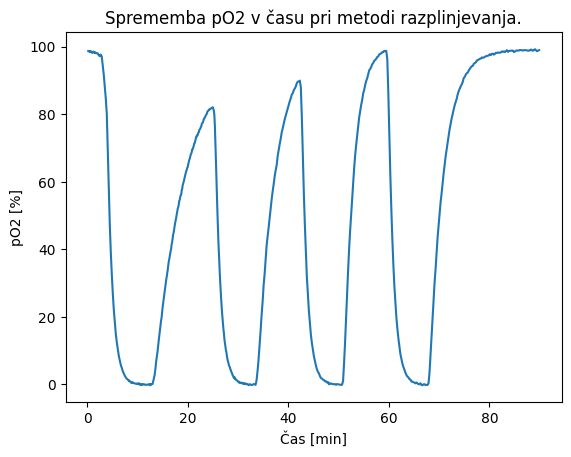

In [106]:
#print(din[2 , :])

#plot grapf for razpl
plt.figure(1)
plt.plot(razpl[0:,0], razpl[0:,1])
plt.xlabel('Čas [min]')
plt.ylabel('pO2 [%]')
plt.title('Sprememba pO2 v času pri metodi razplinjevanja.')
plt.show()


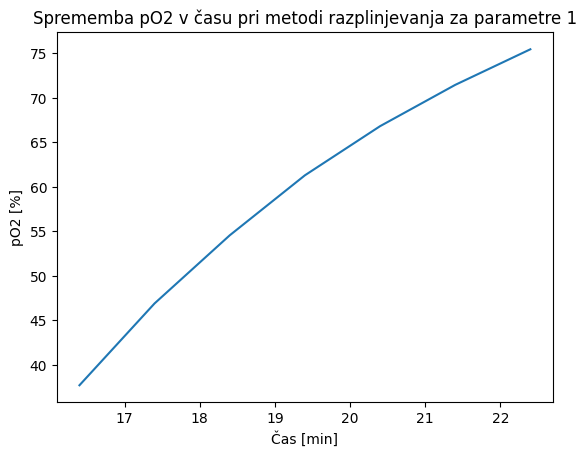

In [107]:
def zoomin(graf, x1, x2,step,naslov):
    #plot grapf for razpl
    razpl_1param = graf[x1:x2:step,:]
    #convert to numpy
    razpl_1param = np.array(razpl_1param)
    razpl_1param 
    #write to excel
    df = pd.DataFrame(razpl_1param)
    df.to_excel('razpl_1param.xlsx', index=False)

    #print(razpl_1param)
    plt.figure(1)
    plt.plot(razpl_1param[:,0], razpl_1param[:,1])
    plt.xlabel('Čas [min]')
    plt.ylabel('pO2 [%]')
    plt.title(naslov)
    plt.show()

    return razpl_1param

razpl_1param = zoomin(razpl, 130, 200,10, 'Sprememba pO2 v času pri metodi razplinjevanja za parametre 1')
razpl_1param = np.column_stack((razpl_1param, np.zeros(razpl_1param.shape[0])*1))
razpl_1param = np.column_stack((razpl_1param, np.zeros(razpl_1param.shape[0])*1))


In [108]:
#add collum to razpl_1param
#razpl_1param = np.column_stack((razpl_1param, np.zeros(razpl_1param.shape[0])))
def naklon(tabela):
    
    for i in range(tabela.shape[0]-1):
        tabela[i,2] = tabela[i+1,0] - tabela[0,0]

    for i in range(tabela.shape[0]-1):
        #logaritem
        tabela[i,3] = np.log( (100 - tabela[0,1]) / (100 - tabela[i,1]) )

    #print(tabela)
    df = pd.DataFrame(tabela)
    #name first column 'čas[min]'
    df.columns = ['čas[min]', 'pO2[%]', 't2-t1[min]', 'ln((Cal-Cal1)/(Cal-Cal2))']
    display(df)
    return tabela

razpl_1param = naklon(razpl_1param)

,čas[min],pO2[%],t2-t1[min],ln((Cal-Cal1)/(Cal-Cal2))
0,16.4,37.71,1.0,0.000000
1,17.4,46.91,2.0,0.159812
2,18.4,54.56,3.0,0.315408
3,19.4,61.30,4.0,0.475961
4,20.4,66.82,5.0,0.629854
5,21.4,71.46,6.0,0.780494
6,22.4,75.46,0.0,0.000000


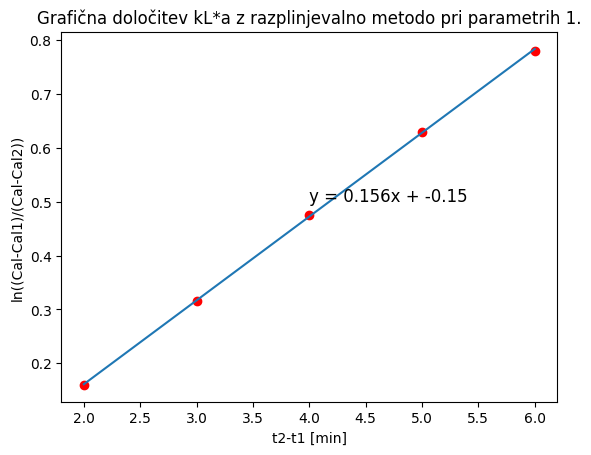

In [109]:
#plot grapf for razpl_1param third and fourth coloumn
def grafnaklon(tabela, naslov):
    
    plt.figure(1)       
    plt.plot(tabela[1:-1,2], tabela[1:-1,3], 'ro')
    plt.xlabel('t2-t1 [min]')
    plt.ylabel('ln((Cal-Cal1)/(Cal-Cal2))')
    plt.title(naslov)
    #red dots for data
    #write equation for trendline on graph
    x = tabela[1:-1,2]
    y = tabela[1:-1,3]
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)
    #write text of equation of trendline
    plt.text(4.0, 0.5, 'y = ' + str(round(m, 3)) + 'x + ' + str(round(b, 3)), fontsize=12)
    plt.show()

grafnaklon(razpl_1param, 'Grafična določitev kL*a z razplinjevalno metodo pri parametrih 1.')




Razplinjevanje za 2 parametre

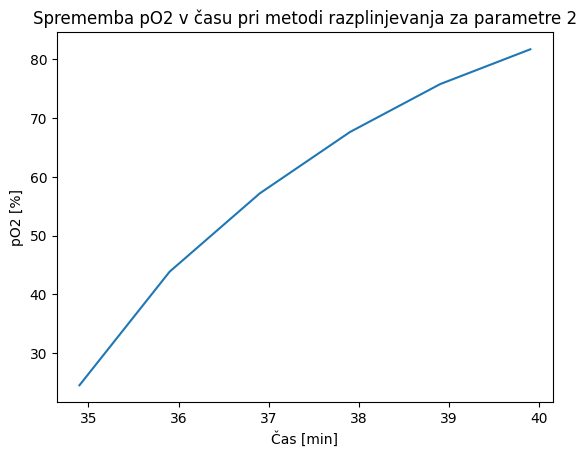

,čas[min],pO2[%],t2-t1[min],ln((Cal-Cal1)/(Cal-Cal2))
0,34.9,24.50,1.0,0.000000
1,35.9,43.85,2.0,0.296106
2,36.9,57.19,3.0,0.567361
3,37.9,67.64,4.0,0.847210
4,38.9,75.80,5.0,1.137780
5,39.9,81.73,0.0,0.000000


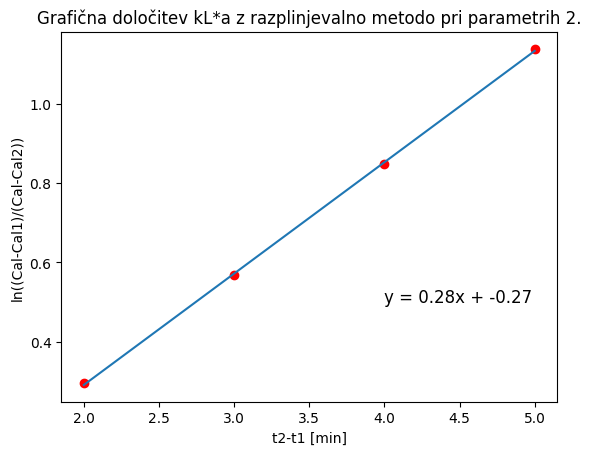

In [110]:
razpl_2param=zoomin(razpl, 300, 330,5, 'Sprememba pO2 v času pri metodi razplinjevanja za parametre 2')
razpl_2param=np.column_stack((razpl_2param, np.zeros(razpl_2param.shape[0])))
razpl_2param=np.column_stack((razpl_2param, np.zeros(razpl_2param.shape[0])))
razpl_2param=naklon(razpl_2param)

grafnaklon(razpl_2param, 'Grafična določitev kL*a z razplinjevalno metodo pri parametrih 2.')


## Razplinjevalna metoda za parametre 3.


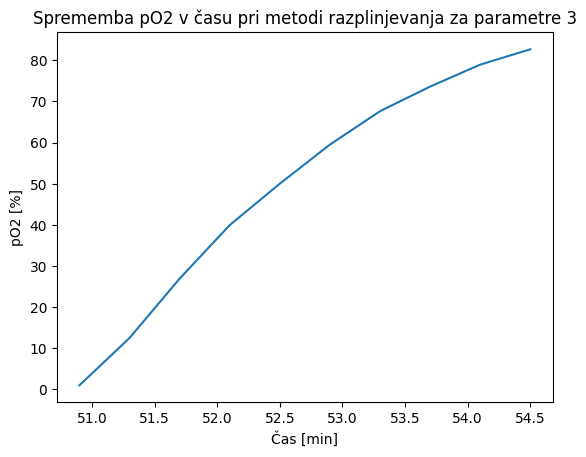

,čas[min],pO2[%],t2-t1[min],ln((Cal-Cal1)/(Cal-Cal2))
0,50.9,0.96,0.4,0.000000
1,51.3,12.47,0.8,0.123542
2,51.7,26.91,1.2,0.303832
3,52.1,39.92,1.6,0.499847
4,52.5,50.00,2.0,0.683501
5,52.9,59.51,2.4,0.894469
6,53.3,67.63,2.8,1.118292
7,53.7,73.61,3.2,1.322539
8,54.1,78.95,3.6,1.548623
9,54.5,82.68,0.0,0.000000


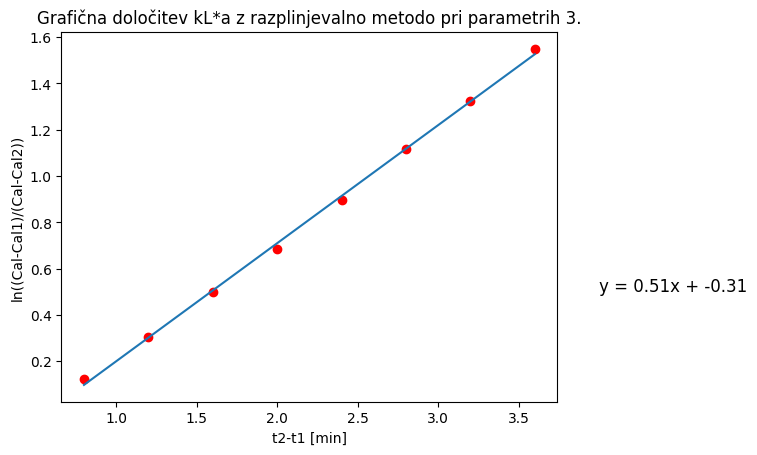

In [111]:
razpl_3param=zoomin (razpl, 380, 400,2, 'Sprememba pO2 v času pri metodi razplinjevanja za parametre 3')
razpl_3param=np.column_stack((razpl_3param, np.zeros(razpl_3param.shape[0])))
razpl_3param=np.column_stack((razpl_3param, np.zeros(razpl_3param.shape[0])))
razpl_3param=naklon(razpl_3param)
grafnaklon(razpl_3param, 'Grafična določitev kL*a z razplinjevalno metodo pri parametrih 3.')


## Razplinjevalna metoda za parametre 4.

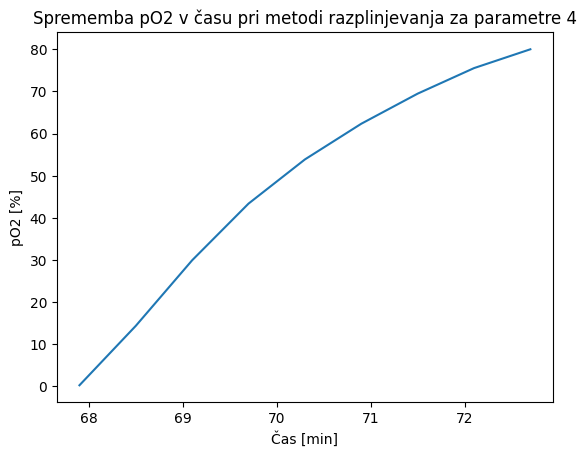

,čas[min],pO2[%],t2-t1[min],ln((Cal-Cal1)/(Cal-Cal2))
0,67.9,0.28,0.6,0.000000
1,68.5,14.39,1.2,0.152564
2,69.1,29.95,1.8,0.353157
3,69.7,43.39,2.4,0.566181
4,70.3,53.87,3.0,0.770903
5,70.9,62.34,3.6,0.973768
6,71.5,69.48,4.2,1.183984
7,72.1,75.54,4.8,1.405327
8,72.7,80.01,0.0,0.000000


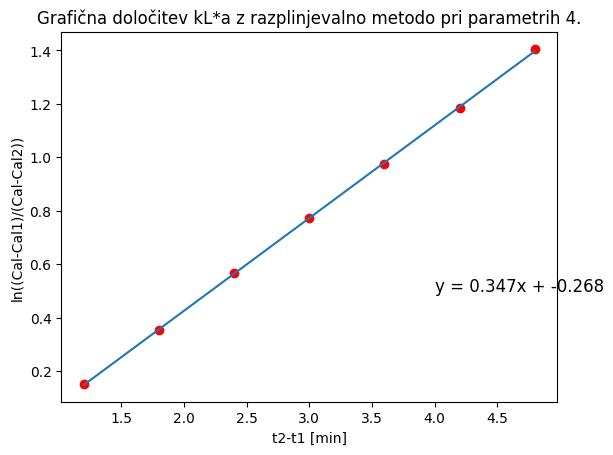

In [112]:
razpl_4param=zoomin (razpl, 465, 490,3, 'Sprememba pO2 v času pri metodi razplinjevanja za parametre 4')
razpl_4param=np.column_stack((razpl_4param, np.zeros(razpl_4param.shape[0])))
razpl_4param=np.column_stack((razpl_4param, np.zeros(razpl_4param.shape[0])))
razpl_4param=naklon(razpl_4param)
grafnaklon(razpl_4param, 'Grafična določitev kL*a z razplinjevalno metodo pri parametrih 4.')   


## Dinamična metoda z mikroorganizmi parametri 1.

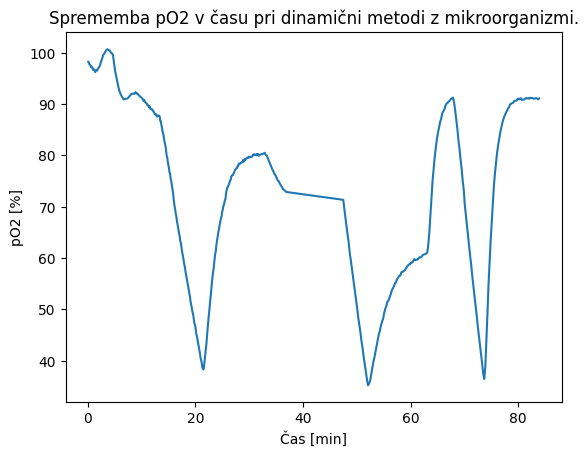

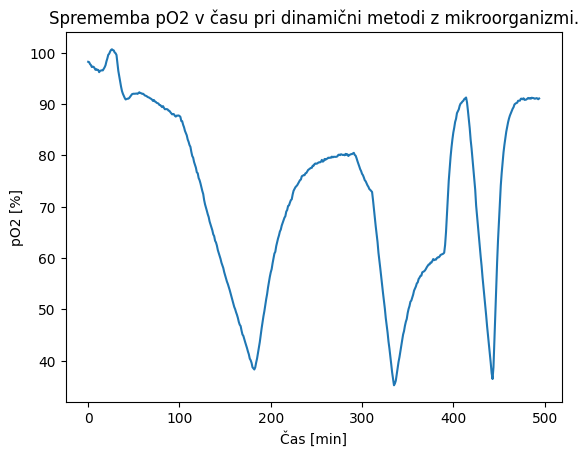

In [113]:
#plot grapf for din
plt.figure(1)
plt.plot(din[0:,0], din[0:,1])
plt.xlabel('Čas [min]')
plt.ylabel('pO2 [%]')
plt.title('Sprememba pO2 v času pri dinamični metodi z mikroorganizmi.')
plt.show()

#plot grapf for din
plt.figure(2)
#put indexes of din x axis
x = np.arange(0, din.shape[0])
plt.plot(x, din[0:,1])



plt.xlabel('Čas [min]')
plt.ylabel('pO2 [%]')
plt.title('Sprememba pO2 v času pri dinamični metodi z mikroorganizmi.')
plt.show()

In [114]:
def naklon_max(tabela,max):
    
    for i in range(tabela.shape[0]-1):
        tabela[i,2] = tabela[i+1,0] - tabela[0,0]

    for i in range(tabela.shape[0]-1):
        #logaritem
        tabela[i,3] = np.log( (max - tabela[0,1]) / (max - tabela[i,1]) )

    #print(tabela)
    df = pd.DataFrame(tabela)
    #name first column 'čas[min]'
    df.columns = ['čas[min]', 'pO2[%]', 't2-t1[min]', 'ln((Cal-Cal1)/(Cal-Cal2))']
    display(df)
    return tabela


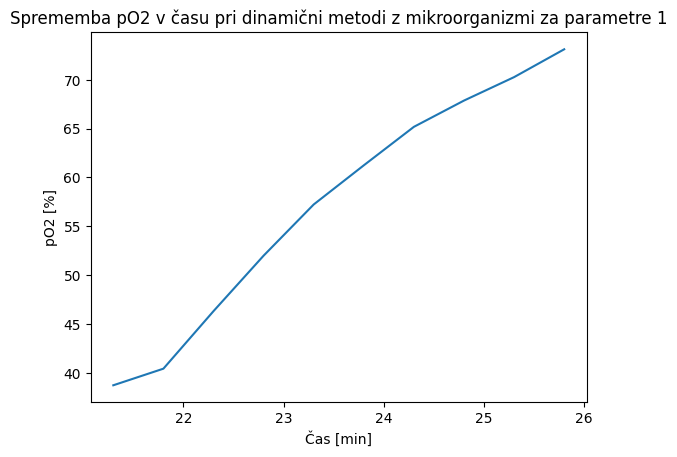

,čas[min],pO2[%],t2-t1[min],ln((Cal-Cal1)/(Cal-Cal2))
0,21.3,38.72,0.5,0.000000
1,21.8,40.42,1.0,0.042054
2,22.3,46.31,1.5,0.203177
3,22.8,51.99,2.0,0.387817
4,23.3,57.23,2.5,0.594934
5,23.8,61.24,3.0,0.788651
6,24.3,65.18,3.5,1.024401
7,24.8,67.87,4.0,1.224696
8,25.3,70.27,4.5,1.445164
9,25.8,73.12,0.0,0.000000


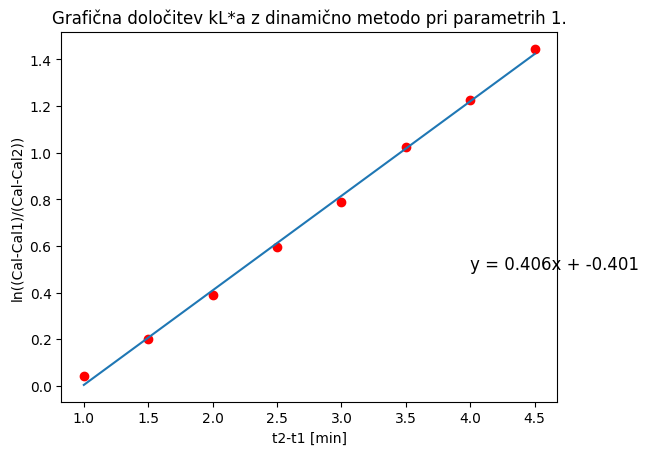

In [115]:
din_1param=zoomin(din, 180, 230,5, 'Sprememba pO2 v času pri dinamični metodi z mikroorganizmi za parametre 1')
din_1param=np.column_stack((din_1param, np.zeros(din_1param.shape[0])))
din_1param=np.column_stack((din_1param, np.zeros(din_1param.shape[0]))) 
din_1param=naklon_max(din_1param,80)
grafnaklon(din_1param, 'Grafična določitev kL*a z dinamično metodo pri parametrih 1.')


## Dinamična metoda z mikroorganizmi pri parametrih 2.


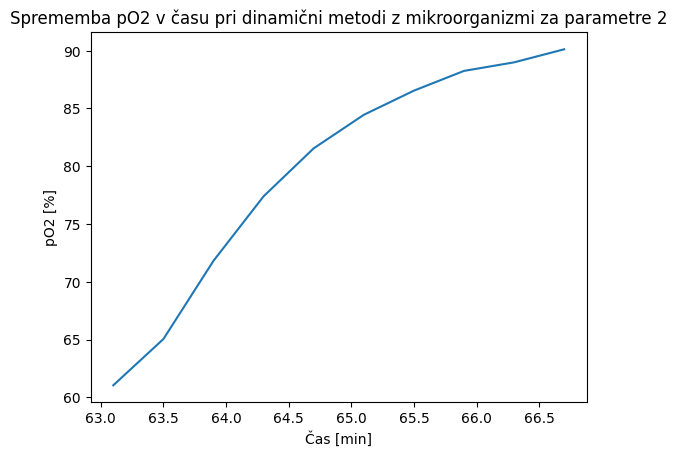

,čas[min],pO2[%],t2-t1[min],ln((Cal-Cal1)/(Cal-Cal2))
0,63.1,61.05,0.4,0.000000
1,63.5,65.05,0.8,0.143358
2,63.9,71.82,1.2,0.445661
3,64.3,77.40,1.6,0.789460
4,64.7,81.55,2.0,1.153515
5,65.1,84.45,2.4,1.520064
6,65.5,86.54,2.8,1.904381
7,65.9,88.25,3.2,2.387928
8,66.3,88.99,3.6,2.701395
9,66.7,90.12,0.0,0.000000


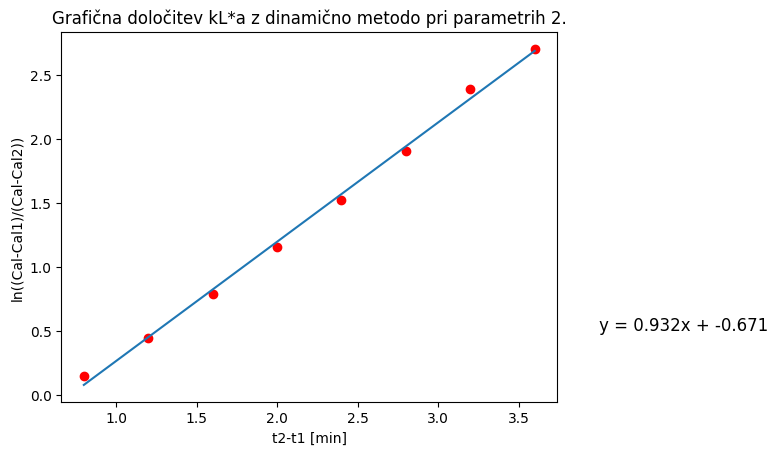

In [116]:
din_2param=zoomin(din, 390, 410,2, 'Sprememba pO2 v času pri dinamični metodi z mikroorganizmi za parametre 2')
din_2param=np.column_stack((din_2param, np.zeros(din_2param.shape[0])))
din_2param=np.column_stack((din_2param, np.zeros(din_2param.shape[0])))

din_2param=naklon_max(din_2param,91)
grafnaklon(din_2param, 'Grafična določitev kL*a z dinamično metodo pri parametrih 2.')



## Dinamična metoda z mikroorganizmi pri parametrih 3.

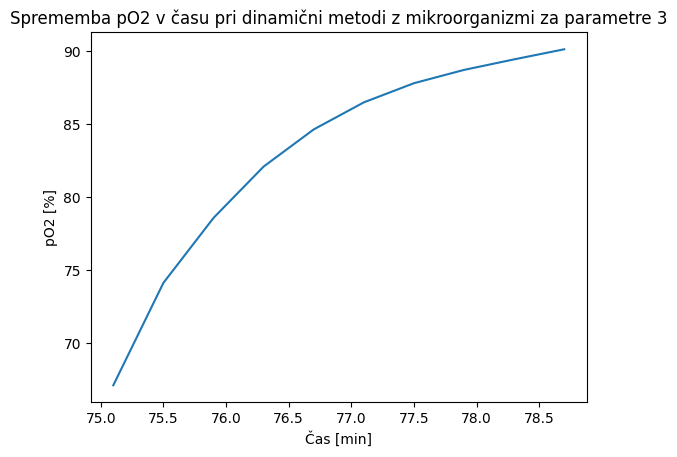

,čas[min],pO2[%],t2-t1[min],ln((Cal-Cal1)/(Cal-Cal2))
0,75.1,67.13,0.4,0.000000
1,75.5,74.13,0.8,0.347086
2,75.9,78.57,1.2,0.652510
3,76.3,82.08,1.6,0.984326
4,76.7,84.62,2.0,1.319454
5,77.1,86.47,2.4,1.661901
6,77.5,87.78,2.8,2.003241
7,77.9,88.69,3.2,2.335375
8,78.3,89.41,3.6,2.708888
9,78.7,90.10,0.0,0.000000


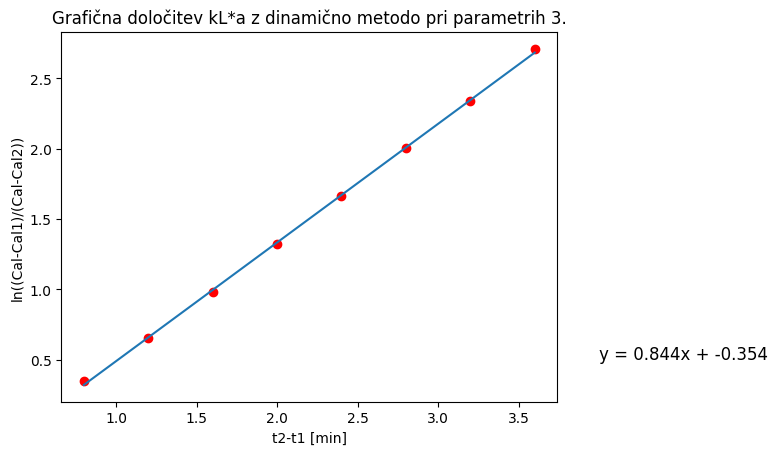

In [117]:
din_3param=zoomin(din, 450, 470,2, 'Sprememba pO2 v času pri dinamični metodi z mikroorganizmi za parametre 3')
din_3param=np.column_stack((din_3param, np.zeros(din_3param.shape[0])))
din_3param=np.column_stack((din_3param, np.zeros(din_3param.shape[0])))
din_3param=naklon_max(din_3param,91)
grafnaklon(din_3param, 'Grafična določitev kL*a z dinamično metodo pri parametrih 3.')
